## **K-Nearest Neighbor(KNN) Algorithm**

* KNN is a Supervised Learning, a non-parametric algorithm, and a lazy learner algorithm that categorizes the new data into the available categories based on similarity.

* It is non-parametric, which means it does not make any assumption on underlying data.

* It is a lazy learner algorithm since it saves the dataset instead of learning immediately from the training set and then uses it to execute an action when classifying data.



**Example:** Let's say we have a picture of a species that resembles both cats and dogs, but we aren't sure if it is one or the other. However, since the KNN algorithm is based on a similarity metric, we can utilise it for this identification. Our KNN model will look for similarities between the new data set's features and those in the photos of cats and dogs, and based on those similarities, it will classify the new data set as either cat- or dog-related.

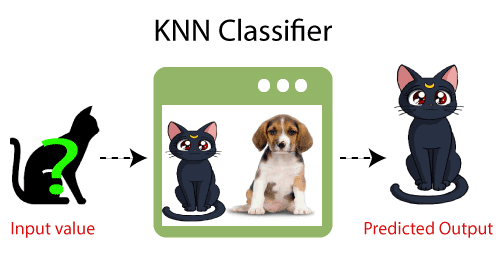

## **Objective of a KNN algorithm**

Let's say there are two categories, A and B, and we have a new data point, x1 (the blue dot in the image). Using the KNN method, we can decide which category that dot belongs to.
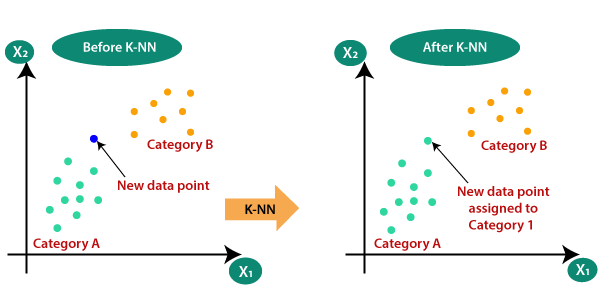

## **Working of KNN:**

The K-NN follows below steps:

Step-1: Select the number K of the neighbors

Step-2: Calculate the Euclidean distance of K number of neighbors

Step-3: Take the K nearest neighbors as per the calculated Euclidean distance.

Step-4: Among these k neighbors, count the number of the data points in each category.

Step-5: Assign the new data points to that category for which the number of the neighbor is maximum.

Step-6: Our model is ready.

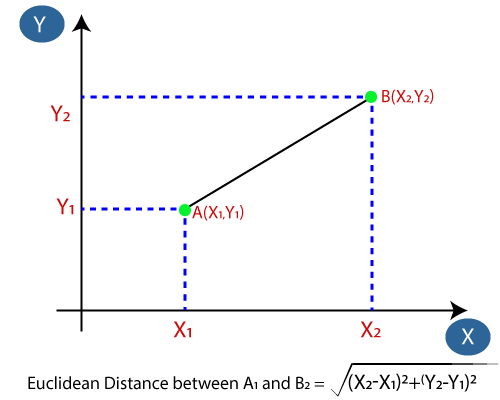

## **How to choose optimal value of K in KNN Algorithm?**


* There isn't a simple way to figure out what K in KNN is worth. To select the ideal value of K, you must experiment with several values. Hyperparameter tuning is the process of selecting the appropriate value of K.

* The dataset you are using completely determines the value of optimal K. The ideal K value for KNN depends heavily on the data. The ideal K may change depending on the circumstances. That is essentially a hit-and-run approach.

* When determining the value of K in KNN, balance must be maintained. K shouldn't be either too big or too little.

* A low value of K indicates that noise will have a greater impact on the outcome.
The accuracy increases as K is increased. You are under-fitting your model if K is too large. The error will increase once more in this scenario. So, you must also guard against your model being too small. Your model should still be able to generalise; otherwise, there is a potential that it will work well on training data but fall flat on its face on real data. A larger K will make the algorithm's calculation costs higher.

* The K value in a KNN cannot be estimated in a single correct way. The general rule is that there is no best way, however you should examine the following ideas:
1. **Square Root Method:** Take square root of the number of samples in the training dataset.
2. **Cross Validation Method:** To determine the ideal value of K in the KNN, we should additionally perform cross validation. Start with K=1, perform cross validation (5–10 fold), assess accuracy, and continue as necessary until the results are reliable. 

 K=1, 2, 3... As K increases, the error usually goes down, then stabilizes, and then raises again. Pick the optimum K at the beginning of the stable zone. This is also called **Elbow** Method.

3. Domain Knowledge also plays a important role while choosing the optimum value of K.

4. K should be an odd number.

## **Python implementation of the KNN algorithm**

You can simply implement KNN in the same sheet of Logistic regression without having to perform EDA again.

That said, please find basic implementation of KNN below.

## **Data Pre-processing step**

In [ ]:
# importing libraries  
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd 

In [ ]:
#importing datasets  
dataset=pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv")

In [ ]:
dataset.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [ ]:
#Extracting Independent and dependent Variable  
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
### random state train test split will be same with all people using random_state=16
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=16)

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler    
scaler=StandardScaler()
scaler

### using fit_transform to Standardize the train data
X_train=scaler.fit_transform(X_train)
X_train

X_test=scaler.transform(X_test)
X_test

array([[-0.23599631,  1.3020034 ,  0.06021527, ..., -0.05733909,
        -0.62524302, -0.4329837 ],
       [ 1.27629508, -1.3997441 ,  0.06021527, ...,  0.39619209,
         0.69017036,  0.52781071],
       [-0.84091286, -1.43010082, -0.96306329, ..., -1.11149262,
        -0.68544501, -1.04439833],
       ...,
       [-0.23599631,  0.178805  ,  0.98116598, ...,  0.88649605,
         0.68716026, -0.52032865],
       [-1.14337114,  0.81629598,  0.8276742 , ...,  1.31551203,
        -0.3031624 , -0.78236349],
       [ 2.18366991, -0.2765457 ,  0.77651027, ...,  1.805816  ,
         1.3523922 ,  1.05188039]])

Fitting K-NN classifier to the Training data:

Now we will fit the K-NN classifier to the training data. To do this we will import the KNeighborsClassifier class of Sklearn Neighbors library. After importing the class, we will create the Classifier object of the class. The Parameter of this class will be

n_neighbors: To define the required neighbors of the algorithm. Usually, it takes 5.

metric='minkowski': This is the default parameter and it decides the distance between the points.

p=2: It is equivalent to the standard Euclidean metric.
And then we will fit the classifier to the training data. Below is the code for it:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  
classifier.fit(X_train, y_train) 

KNeighborsClassifier()

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)  

In [ ]:
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [ ]:
#Creating the Confusion matrix  , accuracy score and classification report.
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
cm= confusion_matrix(y_test, y_pred) 
print(cm)
score=accuracy_score(y_test, y_pred)
print(score)

[[127  20]
 [ 38  46]]
0.7489177489177489


KNN's accuracy is better when we perform in depth EDA just like we performed while implementing logistic regression.

That said, KNN has also been implemented in the other sheet to compare accuracy.


## Cross Validation

* Cross-validation is a technique used in machine learning to evaluate the performance of a predictive model on a given dataset. The basic idea behind cross-validation is to split the data into two sets: a training set, used to train the model, and a validation set, used to evaluate the performance of the model.
<br><br>
* The most common type of cross-validation is **k-fold cross-validation**. In k-fold cross-validation, the data is divided into k equal-sized "folds." The model is then trained on k-1 folds, and the remaining fold is used for validation. This process is repeated k times, with each fold used once for validation. The results of each fold are then averaged to give an overall estimate of the model's performance.
<br><br>
The main advantages of cross-validation are:
<br><br>
    - It provides a more accurate estimate of the performance of a model than a simple train/test split, as it uses multiple test sets.
<br><br>
    - It ensures that the model is not overfitting the training data, as it is evaluated on data that was not used for training.
<br><br>
    - It is useful for comparing the performance of different models or hyperparameters, as it provides a fair comparison between them.
<br><br>
However, cross-validation can also be computationally expensive, as it involves training the model multiple times. It is also important to ensure that the data is split randomly, to avoid bias in the results.
<br><br>
* In cross-validation, you make a fixed number of folds (or partitions) of the data, run the analysis on each fold, and then average![K_fold_cross_validation.png](attachment:K_fold_cross_validation.png) the overall error estimate.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [ ]:
#Implementing cross validation
 
k = 5
kf = KFold(n_splits=k, random_state=None)
model = KNeighborsClassifier()
acc_score = []


In [ ]:
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.7272727272727273, 0.6948051948051948, 0.7337662337662337, 0.7647058823529411, 0.6993464052287581]
Avg accuracy : 0.723979288685171
